# Importing the libraries

In [19]:
!pip install hazm
!pip install pip install stopwords-guilannlp

In [20]:
from __future__ import unicode_literals
from stopwords_guilannlp import stopwords_output
from hazm import *

In [21]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, LSTM, Dropout, Embedding,\
  Bidirectional, GlobalMaxPool1D, Conv1D, Flatten, GlobalMaxPooling1D

from keras.backend import clear_session

# Loading the data

In [22]:
df_train = pd.read_csv('train_set.csv')
df_train.head()

,app_id,description_fa,label
0,0,<p>بازی مین روب یک برنامه فکری است که باید مین...,1
1,1,<p>دراین بازی تعدادی عکس برای شما نشان داده می...,1
2,2,<br>تلاش نافرجام برای درک «بوفالو»<br>مرگ پایا...,7
3,3,<p>فیلم نما ، برنامه ای برای دانلود و پخش آنلا...,7
4,4,<p>* این برنامه حاوی بیش از 500 عکس و ژست برای...,7


### Data distribution visualization

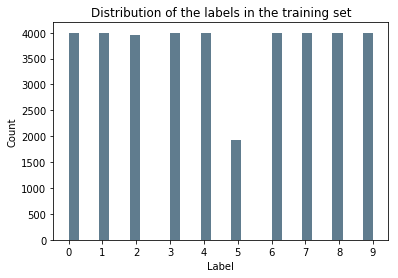

In [23]:
plt.hist(df_train['label'], bins=30, color='#607c8e')
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Distribution of the labels in the training set')
plt.show()

### Dependent and independent variables

In [24]:
X = df_train.iloc[:, 1].values
y = df_train.iloc[:, 2].values

print("X: {}".format(X[0]))
print("y: {}".format(y[0]))

X: <p>بازی مین روب یک برنامه فکری است که باید مین های موجود در صفحه بازی را کشف کنید .قابلیت های این برنامه عبارتند از : <br> </br></p> <p>- دارای سطوح مختلف دشواری از آسان به سخت <br> </br></p> <p>- امکان تعریف بازی سفارشی <br> </br></p> <p>- نمایش آمار بازی ها و عملکرد شما <br> </br></p> <p>- ذخیره تمام بازی های ناتمام، در این صورت میتوانید در آینده به قسمت بازی های ذخیره شده مراجعه کنید و بازی را ادامه دهید. <br> </br></p> <p>از سایر برنامه و بازی های متنوع ما نیز دیدن کنید. <br> </br></p> <p>سپاسگزارم. <br> </br></p>
y: 1


# Preprocessing the textual data

In [15]:
# Stopwords
stop_set = stopwords_output("Persian", "set")
customized_stop_words = ['&nbsp;','nbsp']
def text_preprocess(text):
  # Remove HTML tags 
  text = re.sub(r'<(.*?)>', '', str(text))

  wierd_pattern = re.compile("["
        u"\u200d"
        u"\u200c"
        "]+", flags=re.UNICODE)

  text = wierd_pattern.sub(r'', text)

  # Tokenize the text
  tokenized = word_tokenize(text)
  tokens = []
  for word in tokenized:
    for sw in customized_stop_words:
      word = word.replace(sw, '')
      # Remove 1 letter words and stopwords
    if (word.isalpha() and not (len(word)<=1)) and not (word in stop_set):
      tokens.append(word)
  # Return as a string
  tokens = ' '.join(tokens)
  return tokens

def preprocess(data):
  data_list = []
  for text in data:
    data_list.append(text_preprocess(text))
  return data_list

In [52]:
X_process = preprocess(X)

print('Before: {}'.format(X[0]))
print('After: {}'.format(X_process[0]))

Before: <p>بازی مین روب یک برنامه فکری است که باید مین های موجود در صفحه بازی را کشف کنید .قابلیت های این برنامه عبارتند از : <br> </br></p> <p>- دارای سطوح مختلف دشواری از آسان به سخت <br> </br></p> <p>- امکان تعریف بازی سفارشی <br> </br></p> <p>- نمایش آمار بازی ها و عملکرد شما <br> </br></p> <p>- ذخیره تمام بازی های ناتمام، در این صورت میتوانید در آینده به قسمت بازی های ذخیره شده مراجعه کنید و بازی را ادامه دهید. <br> </br></p> <p>از سایر برنامه و بازی های متنوع ما نیز دیدن کنید. <br> </br></p> <p>سپاسگزارم. <br> </br></p>
After: بازی مین برنامه فکری مین موجود صفحه بازی کشف قابلیت برنامه دارای سطوح دشواری آسان امکان تعریف بازی سفارشی نمایش آمار بازی عملکرد ذخیره بازی ناتمام میتوانید آینده قسمت بازی ذخیره مراجعه بازی ادامه برنامه بازی متنوع دیدن سپاسگزارم


In [35]:
def save_ML_Result(model):
    df_test = pd.read_csv('test_set.csv')
    test_X = df_test.iloc[:, 1].values
    test_X_preproc = preprocess(test_X)
    preprocess_X_test_cv = tf_idf.transform(test_X_preproc)
    test_prediction = model.predict(preprocess_X_test_cv)
    output = [int(i) for i in test_prediction]
    df_test['label'] = output
    df_test.drop(['description_fa'], axis=1, inplace=True)
    df_test.to_csv('prediction.csv', index=None)

# Model construction
In this question, we implemented machine learning models divided into traditional machine learning, ensemble-based model, and deep learning models. For each model, we tuned the hyperparameter for achieving the best results. Also, we split 10% of the training set for the validation set. Since training models with more data gives better result, we used all of the training set in models.

## Feature extraction

In [43]:
tf_idf = TfidfVectorizer()
X_train_cv = tf_idf.fit_transform(X_process)

## Traditional machine learning models

### 1. Naive Bayes

#### Hyperparameter tuning using the Grid search method

In [ ]:
naive_bayes = MultinomialNB()
parameters = [{'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'fit_prior': [True, False]}]

grid_search = GridSearchCV(estimator = naive_bayes,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 70.48 %
Best Parameters: {'alpha': 0.1, 'fit_prior': False}


In [44]:
# Initializing the model
naive_bayes = MultinomialNB(alpha=0.1, fit_prior=False)
# Fitting the data into the model
naive_bayes.fit(X_train_cv, y)
# prediction = naive_bayes.predict(X_test_cv)
save_ML_Result(naive_bayes)

### 2. Logistic Regression

#### Hyperparameter tuning using the Grid search method

In [ ]:
logistic_regression = LogisticRegression(max_iter=100)
parameters = [{'C': [0, 0.5, 1, 5, 10, 50, 100, 200, 500], 'penalty': ['l1', 'l2']}]

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.07 %
Best Parameters: {'C': 1, 'penalty': 'l2'}


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
# Initializing the model
logistic_regression = LogisticRegression(C=1, penalty='l2', max_iter=1000)
# Fitting the data into the model
logistic_regression.fit(X_train_cv, y)
# prediction = logistic_regression.predict(X_test_cv)
save_ML_Result(logistic_regression)

### 3. SVM

In [46]:
# Initializing the model
svm = SVC(kernel = 'rbf', C=100)
# Fitting the data into the model
svm.fit(X_train_cv, y)
# Prediction
# prediction = svm.predict(X_test_cv)
save_ML_Result(svm)

### 4. Decision Tree

#### Hyperparameter tuning using the Grid search method

In [ ]:
decision_Tree = DecisionTreeClassifier()
parameters = [{'criterion':['gini','entropy'], 'max_depth':[None, 1, 5, 10, 20, 50, 90, 100, 150], 'max_features':[None, 'sqrt', 'auto', 'log2'], 'min_samples_split':[1, 2, 5, 10, 20, 40], 'min_samples_leaf':[1, 2, 5, 10, 20,]}]

grid_search = GridSearchCV(estimator = decision_Tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
# Initializing the model
decision_Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=100)
# Fitting the data into the model
decision_Tree.fit(X_train_cv, y)
# prediction = decision_Tree.predict(X_test_cv)
save_ML_Result(decision_Tree)

## Ensemble-based models

### 5. Random Forest

In [ ]:
# Initializing the model
random_forest = RandomForestClassifier(n_estimators=100)
# Fitting the data into the model
random_forest.fit(X_train_cv, y)
# Prediction
# prediction = random_forest.predict(X_test_cv)
save_ML_Result(random_forest)

### 6. Sacking

In [ ]:
estimators = [('naive bayes', naive_bayes),
              ('svm', svm),
              ('decision tree', decision_Tree),
              ('logistic regression', logistic_regression)]
Stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
Stacking.fit(X_train_cv, y)
save_ML_Result(Stacking)

## Deep learning models
For Deep learning model, we encode preprocessed textual data using one-hot encoding and pad them to the maximum length.<br>
for consuming time and saving space we did not o

### Data preparation

In [54]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

X = df_train.iloc[:, 1].values
y = df_train.iloc[:, 2].values

X_preproc = preprocess(X)
test_X = df_test.iloc[:, 1].values
test_X_preproc = preprocess(test_X)

In [ ]:
def get_vocab_size(X_train_preproc, X_test_preproc):
    text_data = []
    vocab = []

    for i in X_train_preproc:
        text_data.append(i)
    for i in X_test_preproc:
        text_data.append(i)
#     for i in test_x:
#         text_data.append(i)

    for text in text_data:
        text_list = text.split(' ')
        for word in text_list:
            vocab.append(word)
    vocab_size = len(set(vocab))

    num_token = [len(tokens.split(' ')) for tokens in X_train_preproc + test_X_preproc]
    num_token = np.array(num_token)
    max_token = np.mean(num_token) + 2 * np.std(num_token)
    max_token = int(max_token)

    return vocab_size, max_token

In [ ]:
vocab_size, max_token = get_vocab_size(X_preproc, test_X_preproc)
vocab_size, max_token

(205239, 195)

In [ ]:
# for consuming time and saving space, we didn't use one-hot y.
# Therefore we use sparse_categorical_crossentropy as the loss function
X_onehot_train = [one_hot(words,vocab_size) for words in X_preproc] 
X_onehot_test = [one_hot(words,vocab_size) for words in test_X_preproc] 

train_embedded_docs=pad_sequences(X_onehot_train,padding='pre',maxlen=max_token)
test_embedded_docs=pad_sequences(X_onehot_test,padding='pre',maxlen=max_token)

X_train_final=np.array(train_embedded_docs)
X_test_final=np.array(test_embedded_docs)

### 7. Bidirectional LSTM

In [ ]:
clear_session()
model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=max_token))
model.add(Bidirectional(LSTM(100, return_sequences=True, name='lstm_layer')))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

my_callbacks = [
    EarlyStopping(patience=5, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
]

model.fit(X_train_final, y, validation_split=0.1, epochs=10, batch_size=64, callbacks=my_callbacks)

### 8. LSTM

In [ ]:
clear_session()
model=Sequential()
model.add(Embedding(vocab_size , 200, input_length=max_token))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

my_callbacks = [
    EarlyStopping(patience=5, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
]

model.fit(X_train_final, y, validation_split=0.1, epochs=10, batch_size=64, callbacks=my_callbacks)

### 9. CNN
Although the Convolutional neural network mainly used in text classification, we can use the CNN for text classification as well

In [ ]:
clear_session()
model=Sequential()
model.add(Embedding(vocab_size , 200, input_length=max_token))
model.add(Conv1D(100, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

my_callbacks = [
    EarlyStopping(patience=5, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
]

model.fit(X_train_final, y, validation_split=0.1, epochs=10, batch_size=64, callbacks=my_callbacks)

### 10. CNN + LSTM

In [ ]:
clear_session()
model=Sequential()
model.add(Embedding(vocab_size , 200, input_length=max_token))
model.add(Conv1D(100, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

my_callbacks = [
    EarlyStopping(patience=5, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
]

model.fit(X_train_final, y, validation_split=0.1, epochs=10, batch_size=64, callbacks=my_callbacks)

### Deep learning models output

In [ ]:
best_model = tf.keras.models.load_model("./saved_models/checkpoints/best_model")
prediction = best_model.predict_classes(X_test_final)
output = [int(i) for i in prediction]
df_test = pd.read_csv('test_set.csv')
df_test['label'] = output
df_test.drop(['description_fa'], axis=1, inplace=True)
df_test.to_csv('prediction.csv', index=None)

# Discussion
Based on the result of the above models, the best result was achieved by the Stacking (stacked generalization) with the accuracy of 75.01%. The result of each models on the quera is as follows:

| Model | Quera Score |
| ------ | ------ |
| Naive Bayes | 713 |
| Logistic Regression | 736 |
| SVM | 749 |
| Decision Tree | 595 |
| Random Forest | 727 |
| **Stacking** | **750** |
| Bi-LSTM | 746 |
| LSTM | 744 |
| CNN | 731 |
| CNN + LSTM | 727 |